# Analyse the results

## Define data directory

A top level directory to store all the data for this experiment

In [1]:
dataDirName = '/home/yram0006/phd/chapter_2/workspace/mortality_data/missingness_experiment/'

## Function to extract lists

In [2]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores

## Box plot

### Create box plot dataframe

In [3]:
import pickle
from pathlib import Path
import pandas as pd


data = []

for p in range(20, 95, 5):
    scoresFile = Path(dataDirName, str(p) + '_missing_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores = getLists(scoresDict)
    for i in range(len(labels)):
        for raw_roc_auc_score in roc_auc_scores[i]:
            data.append([labels[i], p, raw_roc_auc_score])
boxPlotDf = pd.DataFrame(data, columns=['Model', 'Missingness', 'AUROC Score'])

### Plot

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

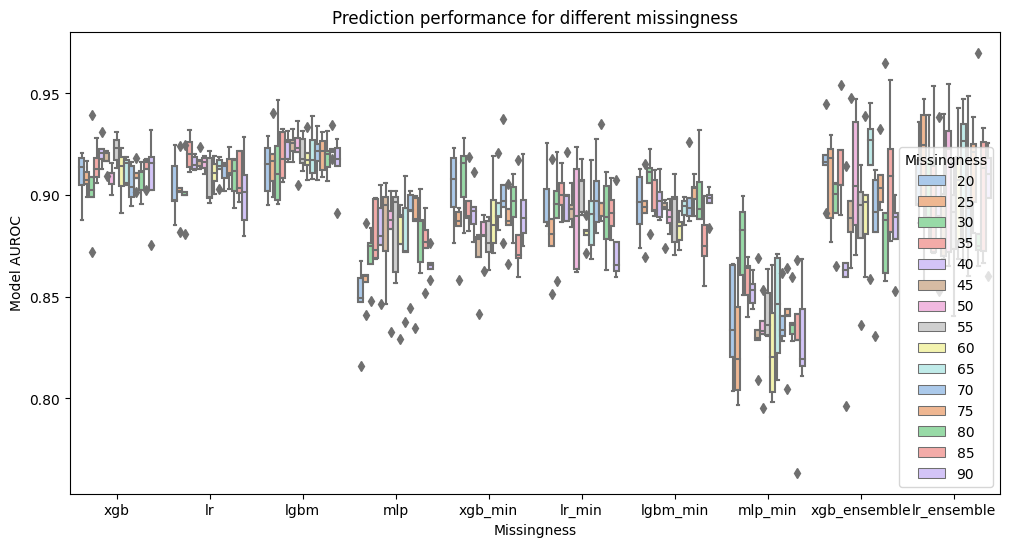

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.boxplot(data=boxPlotDf, x='Model', y='AUROC Score', hue='Missingness', palette=sns.color_palette("pastel"))
ax.set(xlabel='Missingness')
ax.set(ylabel='Model AUROC')
ax.set_title('Prediction performance for different missingness')
plt.show()

## Line plot

### Create line plot dataframe

In [5]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

for p in range(20, 95, 5):
    scoresFile = Path(dataDirName, str(p) + '_missing_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores = getLists(scoresDict)
    for i in range(len(labels)):
        data.append([labels[i], p, roc_auc_scores[i].mean()])
linePlotDf = pd.DataFrame(data, columns=['Model', 'Missingness', 'Average AUROC Score'])

In [6]:
# linePlotDf = linePlotDf[(linePlotDf['Average AUROC Score'] > 0.6) & (linePlotDf['Average AUROC Score'] < 0.95)]

### Plot

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

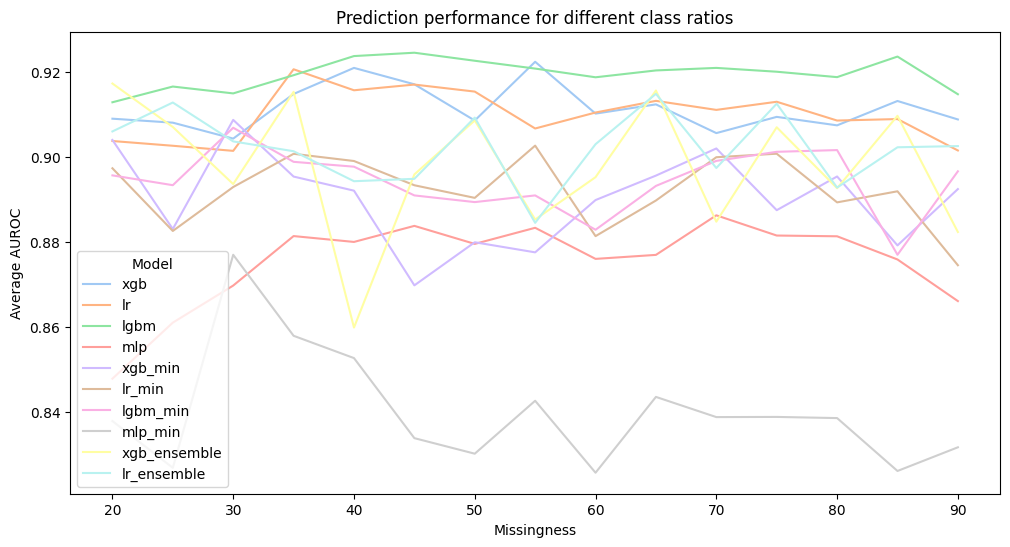

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(data=linePlotDf, x='Missingness', y='Average AUROC Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Missingness')
ax.set(ylabel='Average AUROC')
ax.set_title('Prediction performance for different class ratios')
plt.show()

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

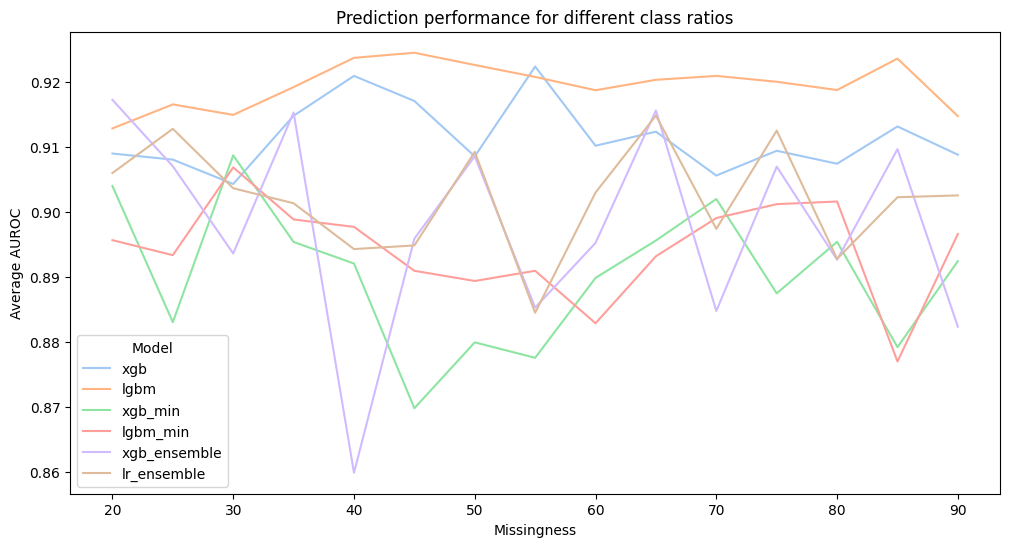

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lineplot(data=linePlotDf[~ linePlotDf.Model.isin(['lr', 'mlp', 'lr_min', 'mlp_min'])], x='Missingness', y='Average AUROC Score', hue='Model', palette=sns.color_palette("pastel"))
ax.set(xlabel='Missingness')
ax.set(ylabel='Average AUROC')
ax.set_title('Prediction performance for different class ratios')
plt.show()

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 1200x600 with 0 Axes>

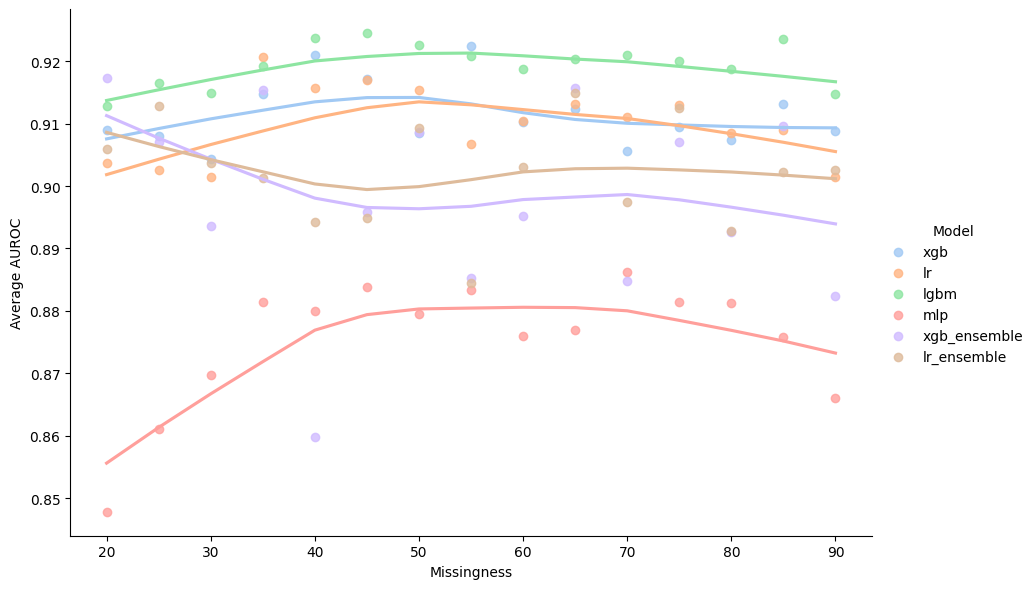

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=linePlotDf[~ linePlotDf.Model.isin(['xgb_min', 'mlp_min', 'lr_min', 'lgbm_min'])],
    x='Missingness',
    y='Average AUROC Score',
    hue='Model',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    lowess=True,
    )
ax.set(xlabel='Missingness')
ax.set(ylabel='Average AUROC')
# ax.set_title('Prediction performance for different class ratios')
plt.show()